## Modelling Credit Risk

<b>Columns Desc:</b>

- SeriousDlqin2yrs Person experienced 90 days past due delinquency or worse Y/N
- RevolvingUtilizationOfUnsecuredLines Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage
- age Age of borrower in years integer
- NumberOfTime3059DaysPastDueNotWorse Number of times borrower has been 30-59 days past due but no worse in the last 2 years. integer
- DebtRatio Monthly debt payments, alimony,living costs divided by monthy gross income percentage
- MonthlyIncome Monthly income real
- NumberOfOpenCreditLinesAndLoans Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) integer
- NumberOfTimes90DaysLate Number of times borrower has been 90 days or more past due. integer
- NumberRealEstateLoansOrLines Number of mortgage and real estate loans including home equity lines of credit integer
- NumberOfTime60-89DaysPastDueNotWorse Number of times borrower has been 60-89 days past due but no worse in the last 2 years. integer
- NumberOfDependents Number of dependents in family excluding themselves (spouse, children etc.) integer

The target is to predict the probability that somebody will experience financial distress in the next two years.which can make banks a guess at the probability of default, are use to determine whether or not a loan should be granted.

### Extracting Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv').drop('Unnamed: 0', axis = 1)

In [13]:
data = pd.read_csv('train.csv').drop('Unnamed: 0', axis = 1)


In [4]:
pd.set_option('display.max_columns',100)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [6]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
df.astype(object).describe().T

,count,unique,top,freq
SeriousDlqin2yrs,150000.0,2.0,0.0,139974.0
RevolvingUtilizationOfUnsecuredLines,150000.0,125728.0,0.0,10878.0
age,150000.0,86.0,49.0,3837.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,16.0,0.0,126018.0
DebtRatio,150000.0,114194.0,0.0,4113.0
MonthlyIncome,120269.0,13594.0,5000.0,2757.0
NumberOfOpenCreditLinesAndLoans,150000.0,58.0,6.0,13614.0
NumberOfTimes90DaysLate,150000.0,19.0,0.0,141662.0
NumberRealEstateLoansOrLines,150000.0,28.0,0.0,56188.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,13.0,0.0,142396.0


In [8]:
listFeat = []
for col in df.columns:
    listFeat.append([col, df[col].dtype, df[col].isna().sum(), df[col].isna().sum()/len(df[col]),
                    df[col].nunique(), df[col].drop_duplicates().sample(2).values ])

dfDesrciption = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                            data=listFeat)
dfDesrciption

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,SeriousDlqin2yrs,int64,0,0.000000,2,"[0, 1]"
1,RevolvingUtilizationOfUnsecuredLines,float64,0,0.000000,125728,"[0.550898204, 0.03552937]"
2,age,int64,0,0.000000,86,"[61, 78]"
3,NumberOfTime30-59DaysPastDueNotWorse,int64,0,0.000000,16,"[1, 5]"
4,DebtRatio,float64,0,0.000000,114194,"[0.026513477999999997, 0.19716799]"
5,MonthlyIncome,float64,29731,0.198207,13594,"[8263.0, 8989.0]"
6,NumberOfOpenCreditLinesAndLoans,int64,0,0.000000,58,"[13, 36]"
7,NumberOfTimes90DaysLate,int64,0,0.000000,19,"[17, 7]"
8,NumberRealEstateLoansOrLines,int64,0,0.000000,28,"[25, 5]"
9,NumberOfTime60-89DaysPastDueNotWorse,int64,0,0.000000,13,"[3, 11]"


we can see that there is some null data on the dataset, so I will fill the missing value

### Cleaning Data

#### Handling Missing Value

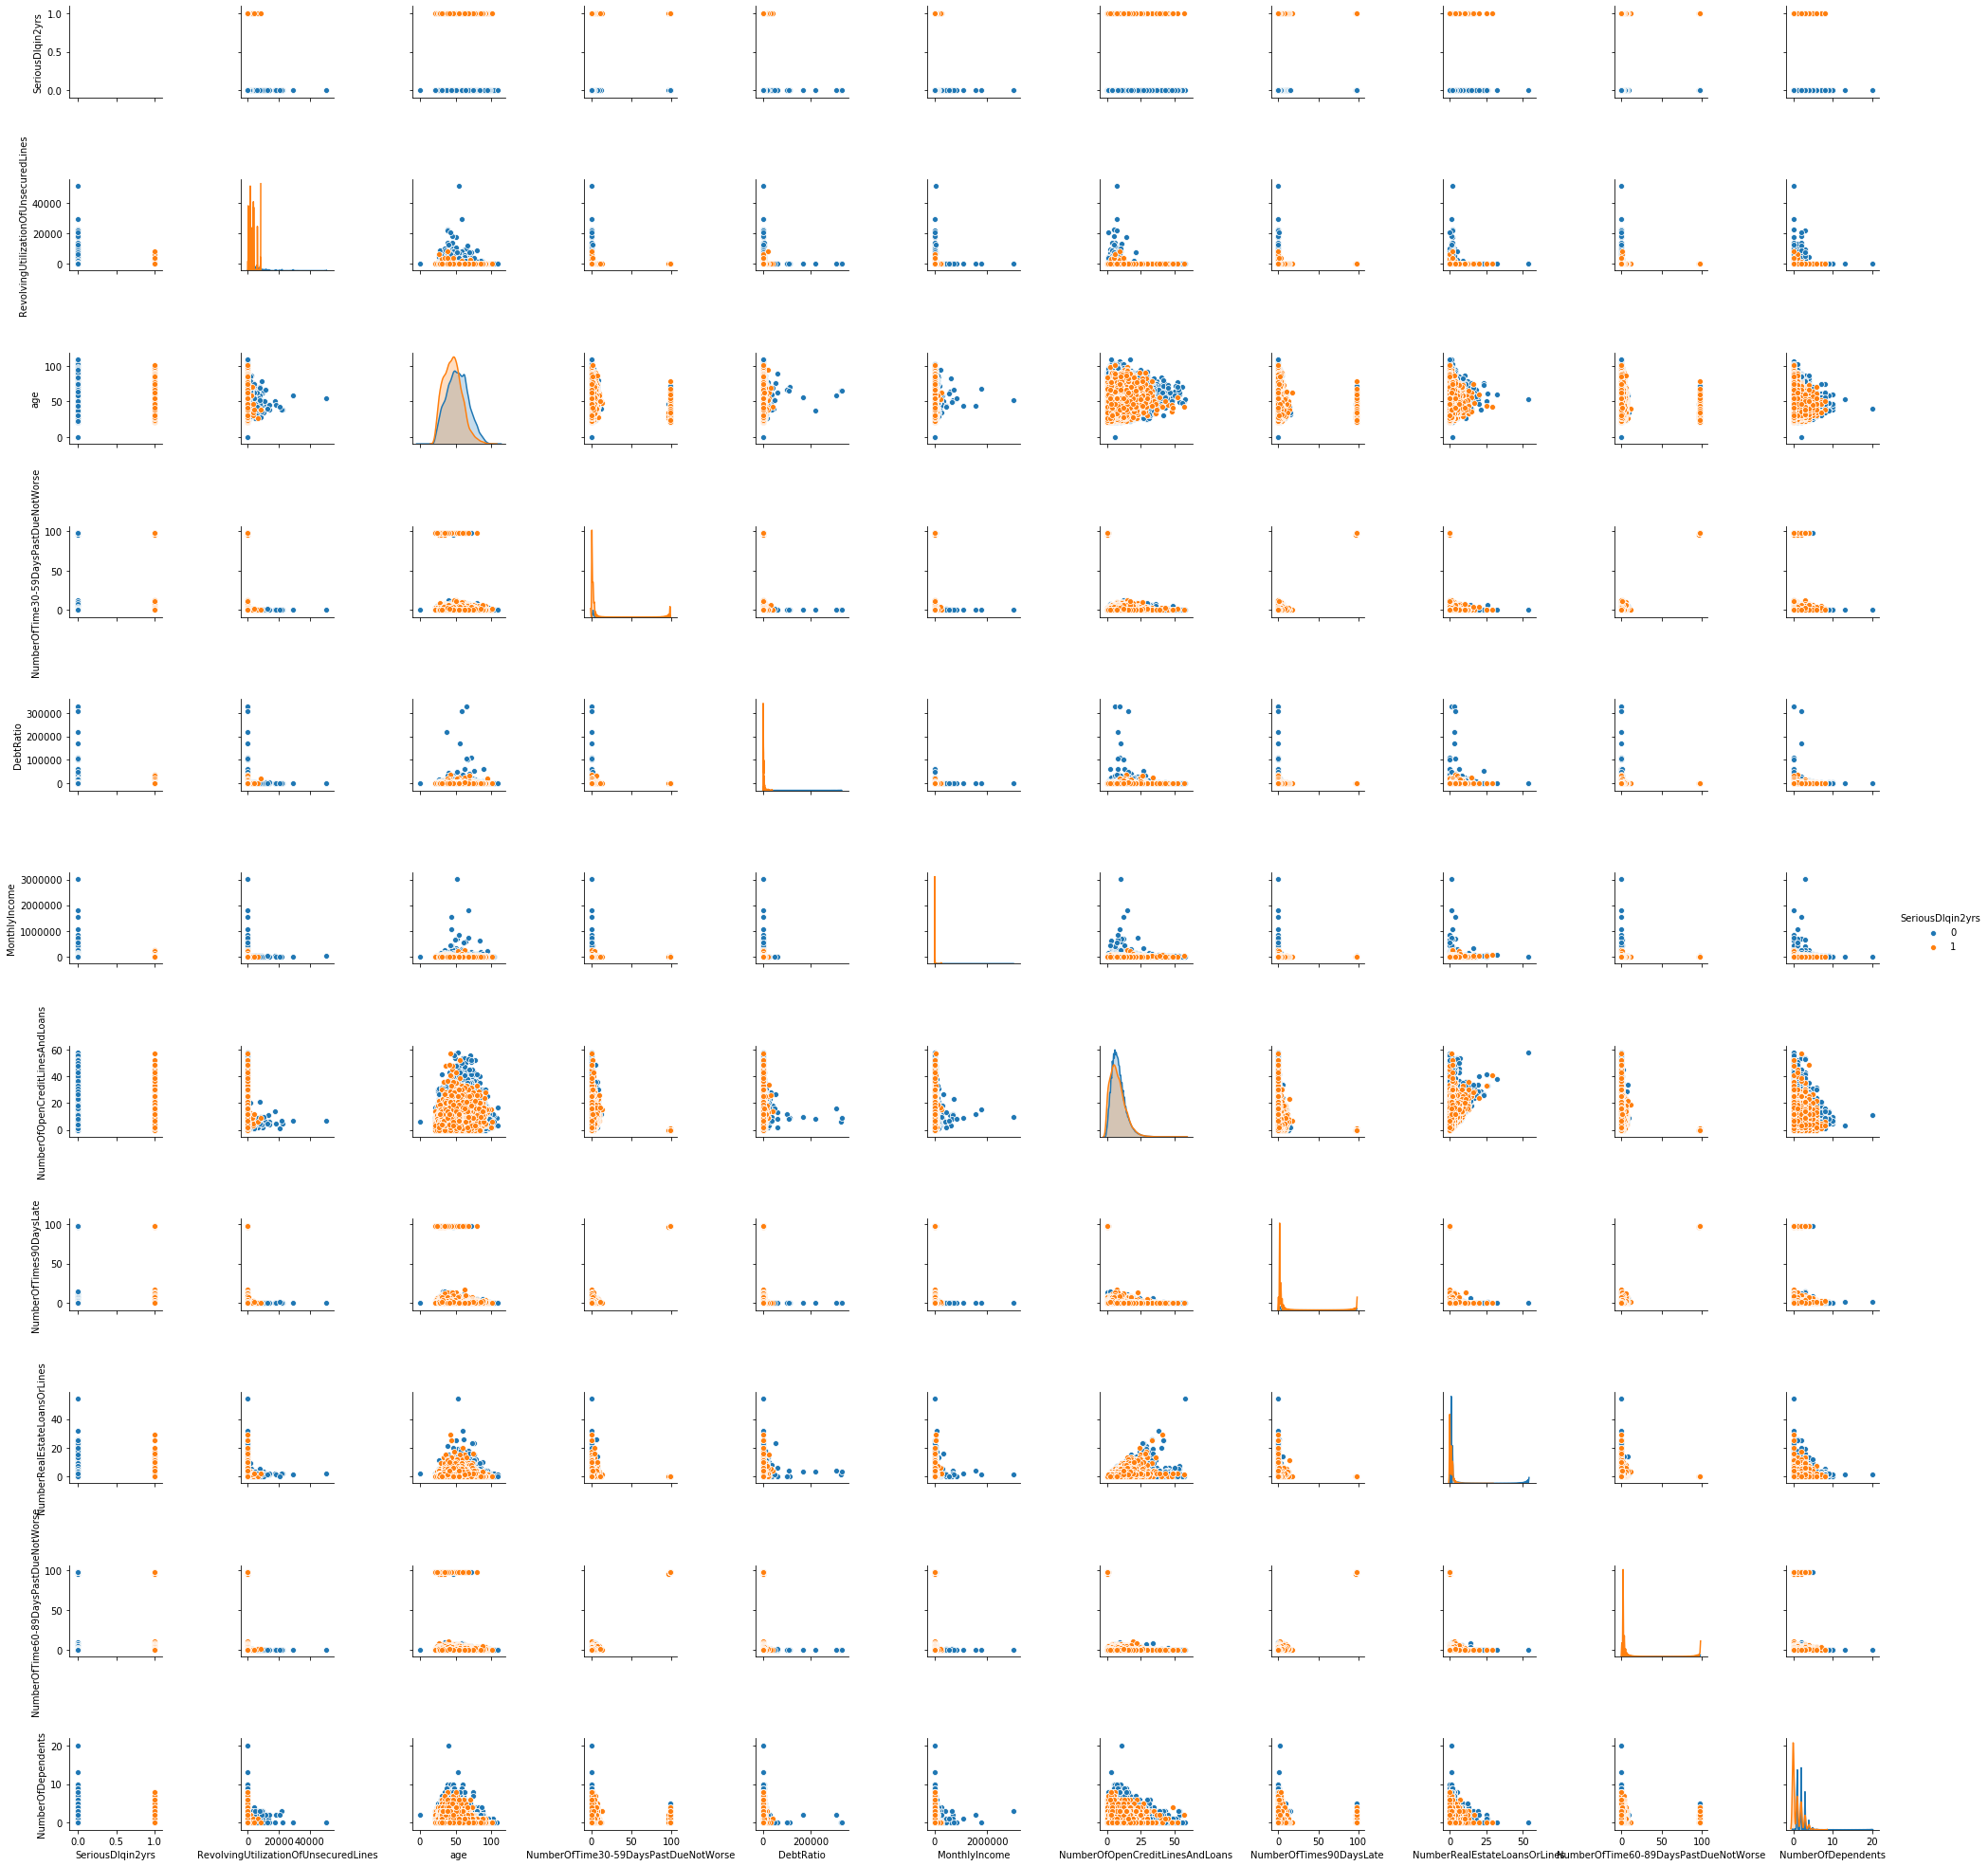

In [9]:
sns.pairplot(data = df,hue='SeriousDlqin2yrs')

,bad,total,rate
bin,,,
"(-0.001, 2005.0]",1015,12028,0.084386
"(2005.0, 3000.0]",1262,13056,0.096661
"(3000.0, 3800.0]",1032,11322,0.091150
"(3800.0, 4544.2]",947,11702,0.080926
"(4544.2, 5400.0]",895,12207,0.073319
"(5400.0, 6300.0]",792,11850,0.066835
"(6300.0, 7500.0]",732,12351,0.059266
"(7500.0, 9083.0]",600,11733,0.051138
"(9083.0, 11666.0]",547,12110,0.045169


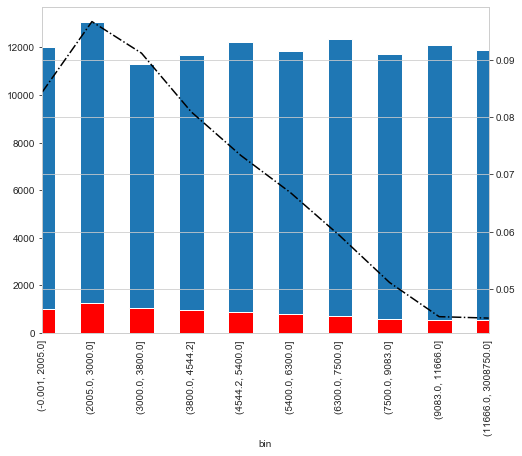

In [18]:
temp = df[['MonthlyIncome', 'SeriousDlqin2yrs']].copy()
temp['bin'] = pd.qcut(df['MonthlyIncome'], 10, duplicates='drop')
group = temp.groupby('bin').agg({'SeriousDlqin2yrs': ['sum', 'count']})
group.columns = ['bad', 'total']
group['rate'] = group['bad'] / group['total']


fig, ax1 = plt.subplots(figsize=(8, 6))
_ = group['total'].plot(kind='bar', ax=ax1)
_ = group['bad'].plot(kind='bar', color='r', ax=ax1)
ax2 = ax1.twinx()
_ = group['rate'].plot(style='k-.', ax=ax2)
ax1.grid()
group


In [19]:
df.loc[df['MonthlyIncome'].isnull(), 'SeriousDlqin2yrs'].mean()

0.05613669234132723

In [20]:
result = np.argmin(np.abs(group['rate'] - df.loc[df['MonthlyIncome'].isnull(), 'SeriousDlqin2yrs'].mean()))
result = (result.left + result.right) / 2
result

6900.0

In [21]:

df['MonthlyIncome_MV'] = df['MonthlyIncome'].fillna(result)

In [25]:

df['MonthlyIncome_AVG'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())

,bad,total,rate
bin,,,
"(-0.001, 1.0]",7030,113218,0.062093
"(1.0, 2.0]",1584,19522,0.081139
"(2.0, 20.0]",1233,13336,0.092457


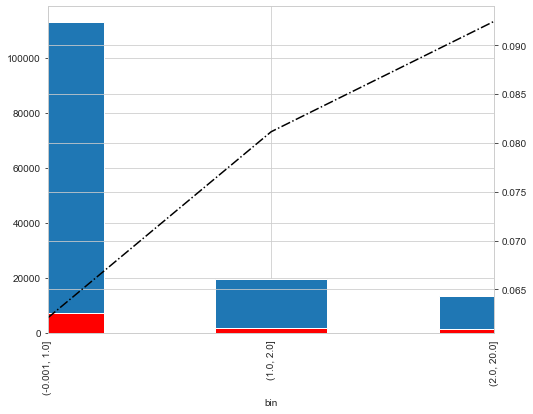

In [27]:
temp = df[['NumberOfDependents', 'SeriousDlqin2yrs']].copy()
temp['bin'] = pd.qcut(df['NumberOfDependents'], 10, duplicates='drop')
group = temp.groupby('bin').agg({'SeriousDlqin2yrs': ['sum', 'count']})
group.columns = ['bad', 'total']
group['rate'] = group['bad'] / group['total']


fig, ax1 = plt.subplots(figsize=(8, 6))
_ = group['total'].plot(kind='bar', ax=ax1)
_ = group['bad'].plot(kind='bar', color='r', ax=ax1)
ax2 = ax1.twinx()
_ = group['rate'].plot(style='k-.', ax=ax2)
group

In [28]:
data.loc[data['NumberOfDependents'].isnull(), 'SeriousDlqin2yrs'].mean()

0.04561671763506626

In [30]:
result = np.argmin(np.abs(group['rate'] - df.loc[df['NumberOfDependents'].isnull(), 'SeriousDlqin2yrs'].mean()))
result = round((result.left + result.right) / 2)
result

0.0

In [31]:

df['NumberOfDependents_MV'] = df['NumberOfDependents'].fillna(result)

In [33]:
df.drop(['MonthlyIncome','NumberOfDependents'],axis=1,inplace=True)

In [34]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
MonthlyIncome_MV                        0
MonthlyIncome_AVG                       0
NumberOfDependents_MV                   0
dtype: int64

#### Analyzing Target

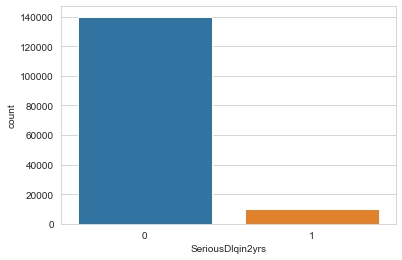

In [35]:
sns.set_style('whitegrid')
sns.countplot(df['SeriousDlqin2yrs'])

In [36]:
len(df[df['SeriousDlqin2yrs']==1])/len(df['SeriousDlqin2yrs'])

0.06684

It seems that we have a case of imbalanced dataset for default prediction

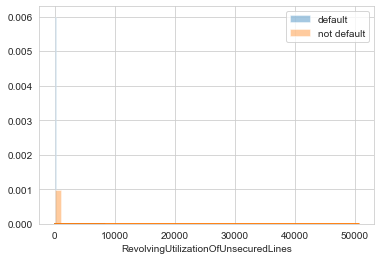

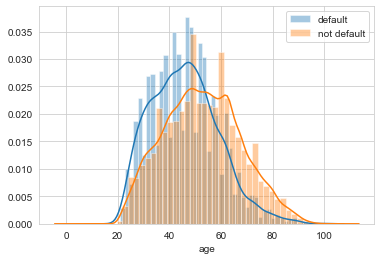

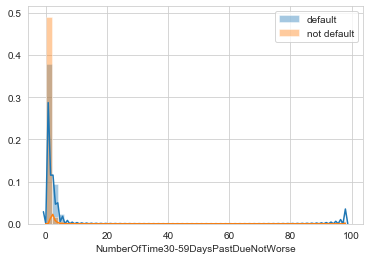

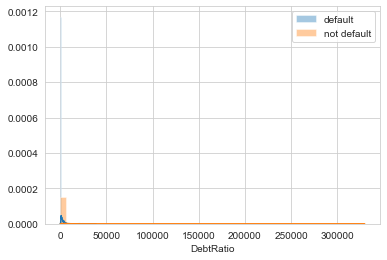

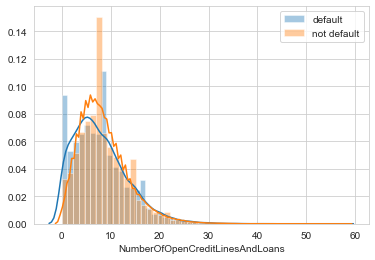

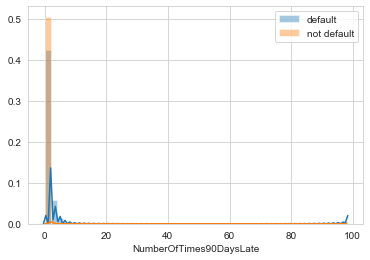

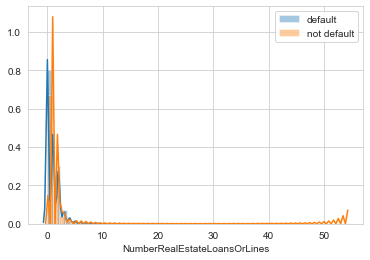

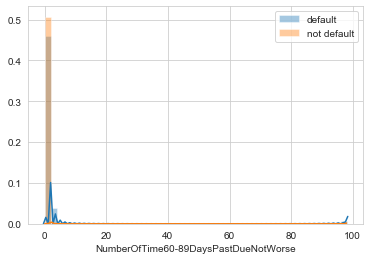

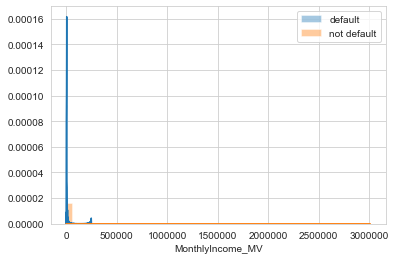

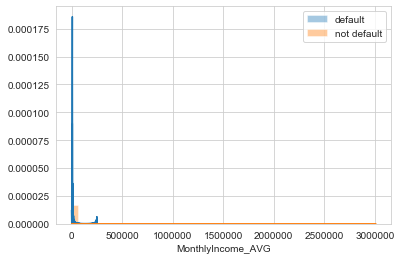

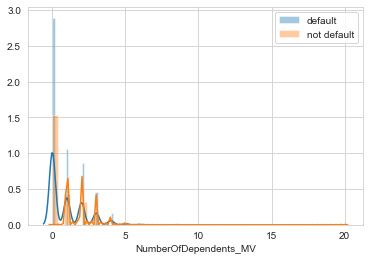

In [37]:
for item in df.select_dtypes(exclude='O').drop(['SeriousDlqin2yrs'],axis=1).columns :
    fig, ax = plt.subplots(1,1)
    sns.distplot(df[df['SeriousDlqin2yrs']==1][item],ax=ax, label='default')
    sns.distplot(df[df['SeriousDlqin2yrs']==0][item], ax=ax, label='not default')
    plt.legend()
    plt.show()

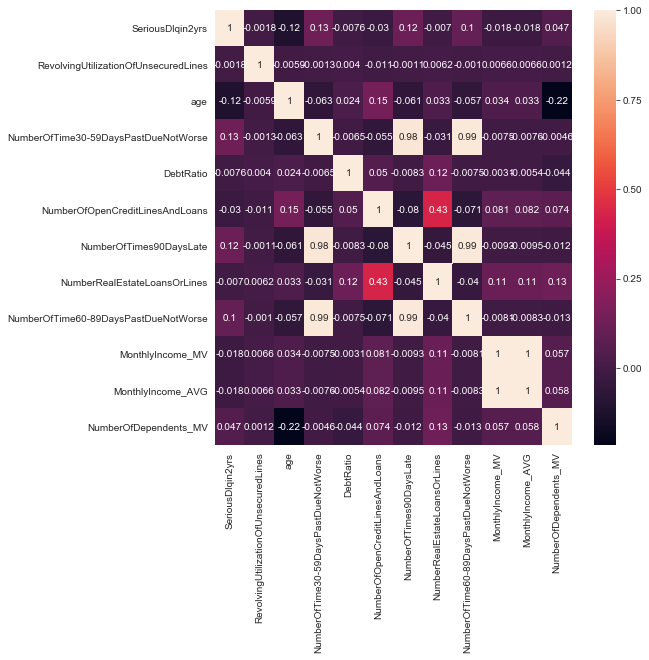

In [38]:
cor=df.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,ax=ax)

### Feature Selection

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop('SeriousDlqin2yrs',axis=1)
y = df['SeriousDlqin2yrs']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=101)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, mean_squared_error

In [45]:
roc_values = []
for feature in X_train.columns:
    clf = LogisticRegression()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [46]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)

NumberOfTime30-59DaysPastDueNotWorse    0.682129
NumberOfTimes90DaysLate                 0.654121
age                                     0.641229
NumberOfTime60-89DaysPastDueNotWorse    0.618828
MonthlyIncome_AVG                       0.576253
MonthlyIncome_MV                        0.575922
NumberOfDependents_MV                   0.549139
NumberOfOpenCreditLinesAndLoans         0.537828
NumberRealEstateLoansOrLines            0.534880
DebtRatio                               0.475314
RevolvingUtilizationOfUnsecuredLines    0.215819
dtype: float64

In [52]:
X.drop('MonthlyIncome_MV',axis=1,inplace=True)

In [47]:
X_train.drop('MonthlyIncome_MV',axis=1,inplace=True)

In [48]:
X_test.drop('MonthlyIncome_MV',axis=1,inplace=True)

In [69]:
df.drop('MonthlyIncome_MV',axis=1,inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
MonthlyIncome_AVG                       150000 non-null float64
NumberOfDependents_MV                   150000 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


### Modelling

#### Scoring Algorithm Models

In [49]:
# function for prediction our dataset 
def find_CVS(features,target,model):

    classification = model()
    score = cross_val_score(classification,features, target, scoring="roc_auc", cv=5).mean()
    return score

In [50]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [51]:
algorithm = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier, GradientBoostingClassifier,
             SVC, KNeighborsClassifier]

In [54]:
all_CVS = []
for item in algorithm :
    score = find_CVS(X, y,item)
    all_CVS.append(score)

In [55]:
df_CVS = pd.DataFrame(all_CVS,index=[['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 
                                     'GradientBoostingClassifier','SVC', 'KNeighborsClassifier']],columns=['CVS'])
df_CVS

,CVS
LogisticRegression,0.676103
DecisionTreeClassifier,0.614027
RandomForestClassifier,0.841321
GradientBoostingClassifier,0.864212
SVC,0.564810
KNeighborsClassifier,0.572290


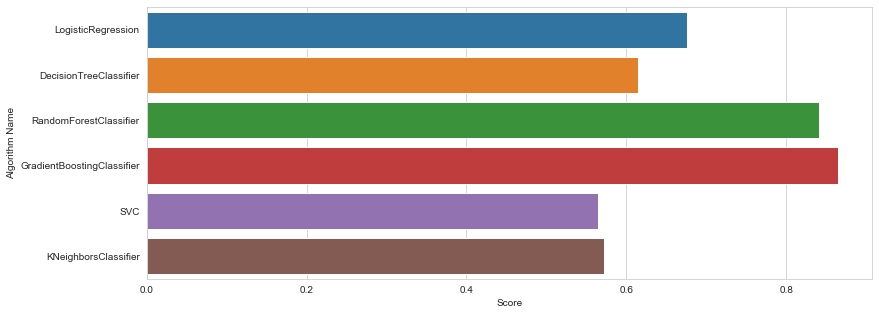

In [56]:
plt.figure(figsize=(13,5))
sns.barplot(y=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 
                                     'GradientBoostingClassifier','SVC', 'KNeighborsClassifier'], x=df_CVS['CVS'])
plt.xlabel('Score')
plt.ylabel('Algorithm Name')
plt.show()

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score

In [58]:
def score_alogrithm(features,target,model):
    X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=101)
    clf = model()
    # Doing oversampling with SMOTE
    sm = SMOTE(random_state=101)
    X_sm, y_sm = sm.fit_sample(X_train,y_train)
    
    # Evaluation Model SMOTE
    clf.fit(X_sm,y_sm)
    prediction_smote = clf.predict(X_sm)   
    accuracy_SMOTE = accuracy_score(y_sm,prediction_smote)
    f1_SMOTE = f1_score(y_sm,prediction_smote)
    
    # Evaluation Model Data Test
    prediction_test = clf.predict(X_test)   
    accuracy_test = accuracy_score(y_test,prediction_test)
    f1_test = f1_score(y_test,prediction_test)
    
    all_score = [accuracy_SMOTE,f1_SMOTE, accuracy_test,f1_test]
    return all_score

In [59]:
all_score=[]
for item in algorithm :
    score = score_alogrithm(X,y,item)
    all_score.append(score)

In [60]:
df_score = pd.DataFrame(all_score,index=[['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 
                                     'GradientBoostingClassifier','SVC', 'KNeighborsClassifier']],
                         columns=['accuracy_SMOTE','f1_SMOTE', 'accuracy_test','f1_test'])
df_score

,accuracy_SMOTE,f1_SMOTE,accuracy_test,f1_test
LogisticRegression,0.668452,0.604178,0.812700,0.303804
DecisionTreeClassifier,0.999330,0.999331,0.831633,0.243069
RandomForestClassifier,0.999326,0.999326,0.888833,0.348506
GradientBoostingClassifier,0.867784,0.864365,0.869333,0.363843
SVC,0.570491,0.570380,0.575300,0.155498
KNeighborsClassifier,0.899696,0.906025,0.736533,0.152295


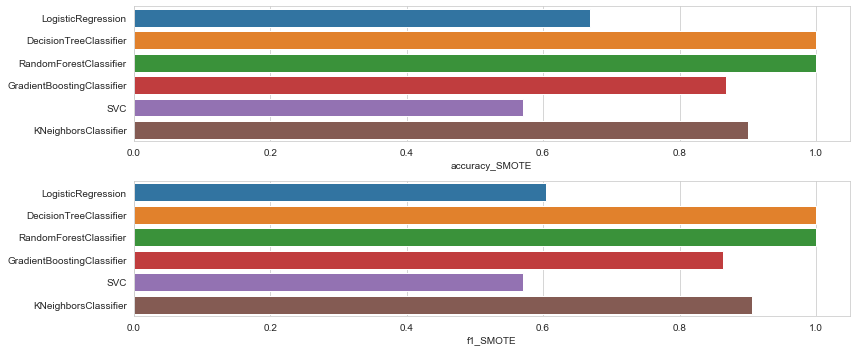

In [61]:
## Graph SMOTE
fig, ax = plt.subplots(2,1,figsize=(12,5))
sns.barplot(y=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 
                                     'GradientBoostingClassifier','SVC', 'KNeighborsClassifier'],
           x= df_score['accuracy_SMOTE'],ax=ax[0])

sns.barplot(y=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 
                                     'GradientBoostingClassifier','SVC', 'KNeighborsClassifier'],
           x= df_score['f1_SMOTE'],ax=ax[1])

plt.tight_layout()

#### Modelling with Random Forest Classifier

In [62]:
model = RandomForestClassifier(class_weight={0:1, 1:6}, min_samples_leaf=12, n_estimators=100, random_state=101)

In [63]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 6},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [64]:
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     27960
           1       0.38      0.51      0.44      2040

    accuracy                           0.91     30000
   macro avg       0.67      0.72      0.69     30000
weighted avg       0.92      0.91      0.92     30000



In [72]:
df.to_csv('clean.csv')

In [65]:
import pickle

In [73]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Feature Importance

In [66]:
score = pd.DataFrame(model.feature_importances_, columns=['Score'])
score['Column'] = X.columns
score

,Score,Column
0,0.285818,RevolvingUtilizationOfUnsecuredLines
1,0.078249,age
2,0.131481,NumberOfTime30-59DaysPastDueNotWorse
3,0.089766,DebtRatio
4,0.052601,NumberOfOpenCreditLinesAndLoans
5,0.170160,NumberOfTimes90DaysLate
6,0.022610,NumberRealEstateLoansOrLines
7,0.076630,NumberOfTime60-89DaysPastDueNotWorse
8,0.073800,MonthlyIncome_AVG
9,0.018885,NumberOfDependents_MV


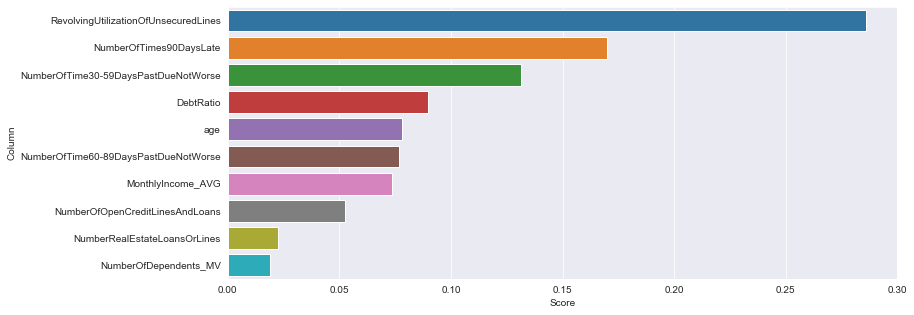

In [67]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.barplot(data=score.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

> We can see that **'RevolvingUtilizationOfUnsecuredLines'** has high effect wether the person will default or not, followed by **'NumberOfTimes90DaysLate'** and **'NumberOfTime30-59DaysPastDueNotWorse'** features.

In [76]:
X.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_AVG', 'NumberOfDependents_MV'],
      dtype='object')